# Classification of Text Documents using Naive Bayes

## 1. Importing Libraries 

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer

##  2. Loading the Dataset

In [3]:
data = pd.read_csv("synthetic_text_data.csv")
data.head()

,text,label
0,Artificial intelligence is advancing in health...,Technology
1,Football fans are excited about the upcoming W...,Sports
2,New policies regarding climate change have spa...,Politics
3,The latest blockbuster movie has shattered box...,Entertainment
4,Quantum computing promises to revolutionize in...,Technology


In [4]:
X = data["text"]
y = data["label"]

## 3. Splitting the Data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Text Preprocessing: Converting Text to Numeric Features

In [6]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

## 5. Training the Naive Bayes Classifier

In [7]:
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


## 6. Making Predictions

In [8]:
y_pred = model.predict(X_test_vectorized)

## 7. Evaluating the Model

Accuracy: 88.23529411764706%


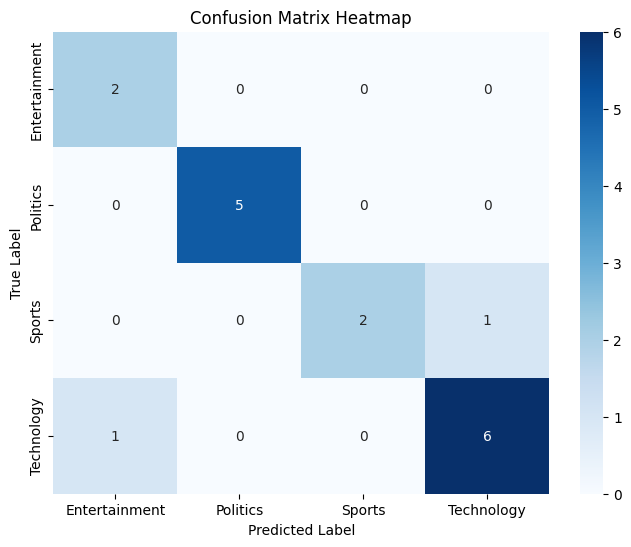

In [13]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy *100}%')

class_labels = np.unique(y_test)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## 8. Prediction on Unseen Data

In [15]:
user_input = ("I love artificial intelligence, machine learning, Deep learning and Generative AI")

user_input_vectorized = vectorizer.transform([user_input])
predicted_label = model.predict(user_input_vectorized)
print(f"The input text belongs to the '{predicted_label[0]}' category.")

The input text belongs to the 'Technology' category.
